In [2]:
!pip install numpy pandas scikit-learn matplotlib openpyxl

C:\Users\Dell\AppData\Local\Temp\ipykernel_18444\1572505747.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=interns_df, palette='viridis')


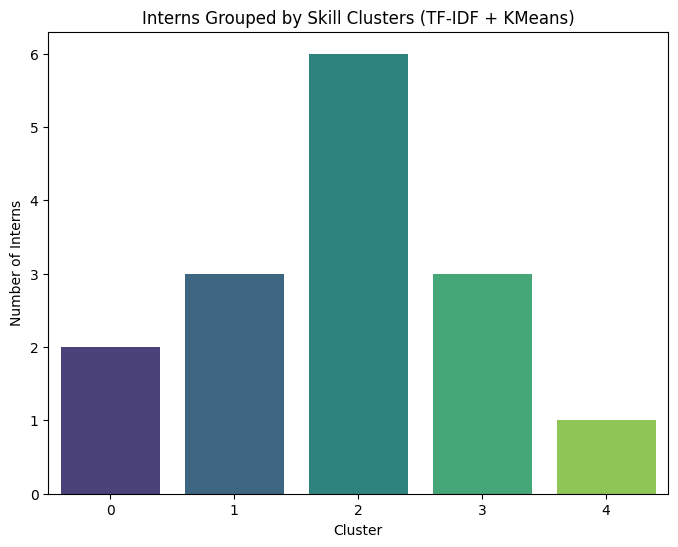

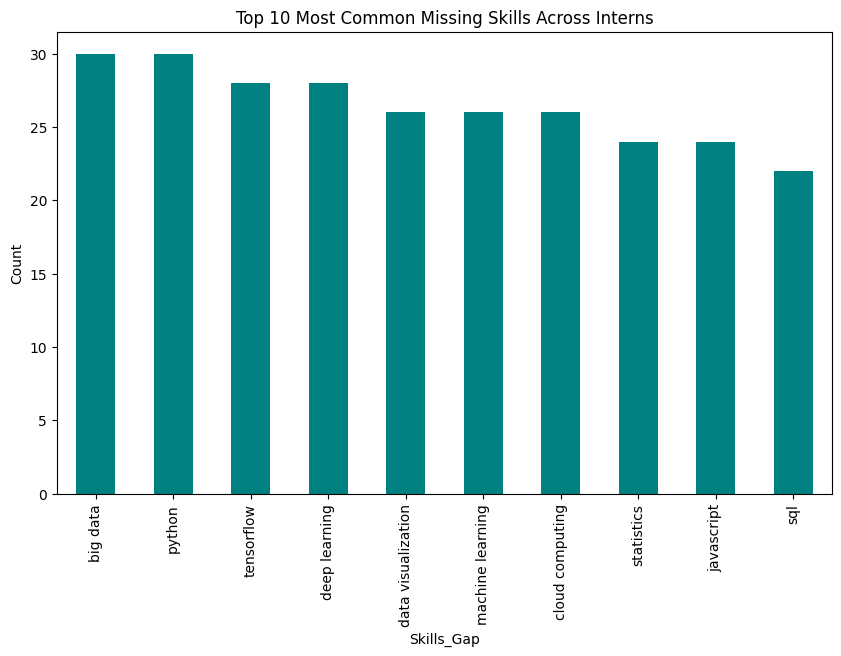

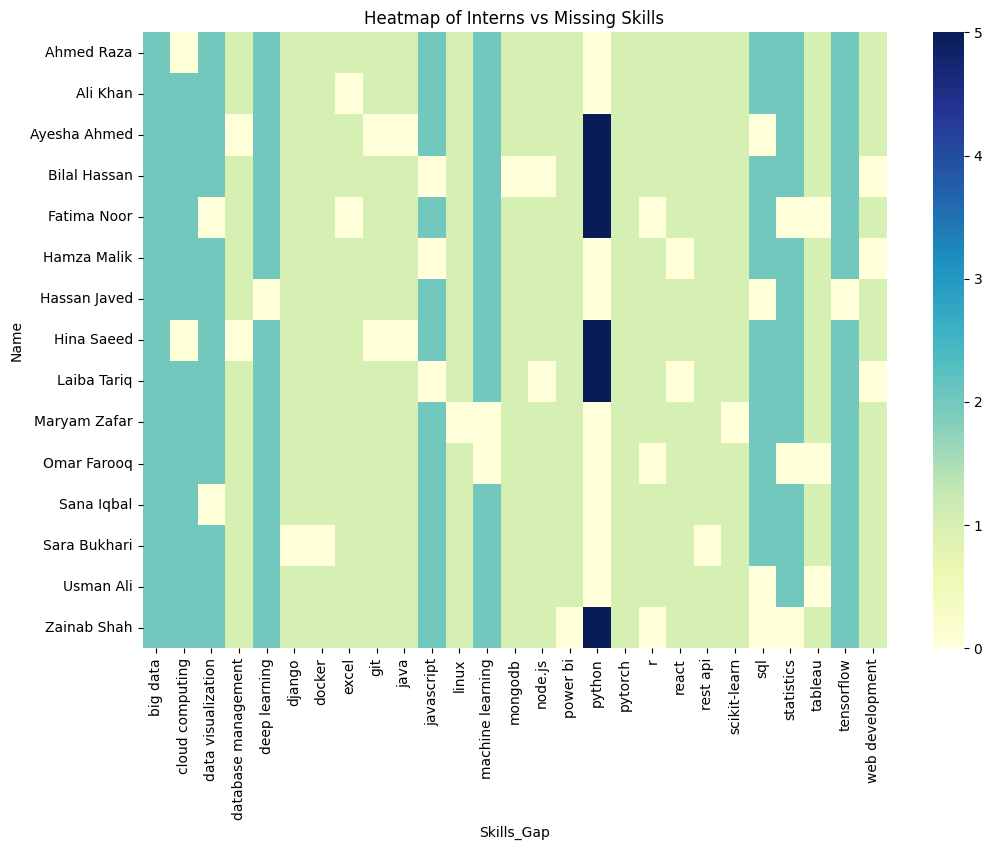


=== Interns Data with Clusters ===
   Intern_ID          Name  Cluster
0     INT001      Ali Khan        2
1     INT002  Ayesha Ahmed        0
2     INT003   Hamza Malik        3
3     INT004   Fatima Noor        1
4     INT005     Usman Ali        2
5     INT006  Sara Bukhari        2
6     INT007  Bilal Hassan        3
7     INT008  Maryam Zafar        2
8     INT009   Zainab Shah        1
9     INT010    Ahmed Raza        4
10    INT011  Hassan Javed        2
11    INT012   Laiba Tariq        3
12    INT013   Omar Farooq        2
13    INT014    Hina Saeed        0
14    INT015    Sana Iqbal        1

=== Skills Gap Analysis (Sample) ===
   Intern_ID          Name  Job_ID                       Role  \
0     INT001      Ali Khan  JOB001             Data Scientist   
1     INT001      Ali Khan  JOB002          Software Engineer   
2     INT001      Ali Khan  JOB003               Data Analyst   
3     INT001      Ali Khan  JOB004  Machine Learning Engineer   
4     INT001      Ali Kha

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

intern_skills_data = {
    'Intern_ID': ['INT001', 'INT002', 'INT003', 'INT004', 'INT005', 'INT006', 'INT007', 'INT008', 'INT009', 'INT010',
                  'INT011', 'INT012', 'INT013', 'INT014', 'INT015'],
    'Name': ['Ali Khan', 'Ayesha Ahmed', 'Hamza Malik', 'Fatima Noor', 'Usman Ali',
             'Sara Bukhari', 'Bilal Hassan', 'Maryam Zafar', 'Zainab Shah', 'Ahmed Raza',
             'Hassan Javed', 'Laiba Tariq', 'Omar Farooq', 'Hina Saeed', 'Sana Iqbal'],
    'Skills': [
        'Python, Data Analysis, Excel, Basic Machine Learning, Pandas',
        'Java, SQL, Database Management, Basic Python, Git',
        'Python, Web Development, HTML, CSS, JavaScript, React',
        'R, Statistics, Data Visualization, Excel, Tableau',
        'Python, Basic Machine Learning, SQL, Tableau, Numpy',
        'Python, Django, PostgreSQL, REST API, Docker',
        'JavaScript, Node.js, MongoDB, Web Development, Express.js',
        'Python, Machine Learning, Scikit-learn, Data Analysis, Linux',
        'R, SQL, Power BI, Statistics, Data Cleaning',
        'C++, Python, Algorithms, Data Structures, Cloud Computing',
        'Python, Data Science, Deep Learning, SQL, TensorFlow',
        'HTML, CSS, JavaScript, React, Node.js, Web Development',
        'R, Python, Statistics, Machine Learning, Tableau',
        'Java, Spring Boot, Database Management, Git, Cloud Computing',
        'Python, Numpy, Pandas, Data Cleaning, Data Visualization'
    ],
    'Proficiency_Level': [
        'Intermediate, Intermediate, Advanced, Beginner, Intermediate',
        'Advanced, Intermediate, Intermediate, Beginner, Intermediate',
        'Intermediate, Advanced, Advanced, Intermediate, Intermediate, Beginner',
        'Advanced, Advanced, Intermediate, Advanced, Intermediate',
        'Intermediate, Beginner, Intermediate, Intermediate, Intermediate',
        'Advanced, Intermediate, Intermediate, Intermediate, Beginner',
        'Intermediate, Intermediate, Intermediate, Advanced, Intermediate',
        'Advanced, Intermediate, Advanced, Intermediate, Beginner',
        'Intermediate, Intermediate, Intermediate, Advanced, Intermediate',
        'Advanced, Intermediate, Advanced, Advanced, Beginner',
        'Advanced, Intermediate, Advanced, Intermediate, Advanced',
        'Intermediate, Advanced, Intermediate, Intermediate, Advanced',
        'Advanced, Intermediate, Advanced, Advanced, Beginner',
        'Advanced, Intermediate, Intermediate, Intermediate, Intermediate',
        'Intermediate, Intermediate, Intermediate, Intermediate, Intermediate'
    ]
}

industry_jobs_data = {
    'Job_ID': ['JOB001', 'JOB002', 'JOB003', 'JOB004', 'JOB005'],
    'Role': ['Data Scientist', 'Software Engineer', 'Data Analyst', 'Machine Learning Engineer', 'Full Stack Developer'],
    'Required_Skills': [
        'Python, Machine Learning, Deep Learning, SQL, Data Visualization, Statistics, Big Data, TensorFlow',
        'Java, Python, JavaScript, Web Development, Database Management, Cloud Computing, Docker, Git',
        'Python, R, SQL, Excel, Data Visualization, Statistics, Tableau, Power BI',
        'Python, Machine Learning, Deep Learning, Scikit-learn, TensorFlow, PyTorch, Big Data, Linux',
        'JavaScript, React, Node.js, Python, Django, MongoDB, REST API, Cloud Computing'
    ],
    'Experience_Level': ['Mid-Senior', 'Mid-Senior', 'Entry-Mid', 'Mid-Senior', 'Mid-Senior']
}

# Convert to DataFrames
interns_df = pd.DataFrame(intern_skills_data)
jobs_df = pd.DataFrame(industry_jobs_data)

# ======================================
# 2. NLP WITH TF-IDF (Vectorize Skills)
# ======================================
vectorizer = TfidfVectorizer(stop_words='english')
all_skills_text = pd.concat([interns_df['Skills'], jobs_df['Required_Skills']], axis=0)
tfidf_matrix = vectorizer.fit_transform(all_skills_text)

# ======================================
# 3. CLUSTERING (Group Similar Skillsets)
# ======================================
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
interns_clusters = kmeans.fit_predict(tfidf_matrix[:len(interns_df)])
interns_df['Cluster'] = interns_clusters

# ======================================
# 4. SKILLS GAP ANALYSIS
# ======================================
def find_skills_gap(intern_skills, job_skills):
    intern_set = set([s.strip().lower() for s in intern_skills.split(",")])
    job_set = set([s.strip().lower() for s in job_skills.split(",")])
    return list(job_set - intern_set)

skills_gap_results = []
for _, intern in interns_df.iterrows():
    for _, job in jobs_df.iterrows():
        gap = find_skills_gap(intern['Skills'], job['Required_Skills'])
        skills_gap_results.append({
            'Intern_ID': intern['Intern_ID'],
            'Name': intern['Name'],
            'Job_ID': job['Job_ID'],
            'Role': job['Role'],
            'Skills_Gap': gap
        })

skills_gap_df = pd.DataFrame(skills_gap_results)

# ======================================
# 5. VISUALIZATIONS
# ======================================
# Cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=interns_df, palette='viridis')
plt.title('Interns Grouped by Skill Clusters (TF-IDF + KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Number of Interns')
plt.show()

# Top 10 most common missing skills
all_gaps = skills_gap_df['Skills_Gap'].explode().dropna()
plt.figure(figsize=(10, 6))
all_gaps.value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Most Common Missing Skills Across Interns')
plt.ylabel('Count')
plt.show()

# Heatmap of Interns vs Skills Gaps
pivot_table = skills_gap_df.explode('Skills_Gap').pivot_table(
    index='Name', columns='Skills_Gap', aggfunc='size', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Interns vs Missing Skills')
plt.show()

# ======================================
# 6. OUTPUT
# ======================================
print("\n=== Interns Data with Clusters ===")
print(interns_df[['Intern_ID', 'Name', 'Cluster']])

print("\n=== Skills Gap Analysis (Sample) ===")
print(skills_gap_df.head(20))
